In [3]:
%load_ext autoreload
%autoreload 2

from rw_tokenize import *
import pickle
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from sklearn.decomposition import PCA

In [5]:
retracted = get_driver()

client = MongoClient ("localhost", 27017)
db = client.retraction_watch
retracted = db.retracted

In [6]:
document_type="text"

In [7]:
doc_cursor = retracted.find(
    {document_type:{"$exists":1}},
    {document_type:1}
)

In [8]:
texts = [clean(doc[document_type]) for i,doc in enumerate(doc_cursor) if i%10!=0 or print(i) or True ]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600


In [32]:
from  sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

params = {"ngram_range":(1,3),
        "stop_words":"english",
        "token_pattern":r"\b[a-z][a-z]+\b",
        "max_df" : 0.3,
        "min_df" : 0.05}

count_vectorizer = CountVectorizer(**params)
tfidf_vectorizer = TfidfVectorizer(**params)


In [33]:
plt.style.use("fivethirtyeight")
x = []
y = []
for i in range(10, 100):
    y.append(i/100)
    x.append(required_topics[i])
plt.plot(x,y, color="brown")
plt.title("PCA / Tokenizer Quality")
plt.ylabel("Retained variance")
plt.xlabel("number of topics")cv_data = count_vectorizer.fit_transform(texts)
tfidf_data = count_vectorizer.fit_transform(texts)

In [12]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
from sklearn.decomposition import NMF, TruncatedSVD

n_comp = 50
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [26]:
def model_topic_value(model, data, label="", save=False):
    n_topics = []
    variance = []
    for i in range(10,100):
        variance.append(i/100)
        model = model(n_components=i/100)
        model.fit(data)
        n_topics.append(len(model.components_))
    if save and label:
        with open(label+".pkl", "wb") as picklefile:
            pickle.dump({"n_topics":n_topics, "variance":variance}, picklefile)

In [38]:
model_topic_value(PCA, cv_data.todense(), "cv_data_03", True)

TypeError: 'PCA' object is not callable

In [9]:
path = "pickles/{}.pkl"
with open(path.format("tfidf_data_06"), "rb") as pklfile:
    tf6_res = pickle.load(pklfile)
with open(path.format("tfidf_data"), "rb") as pklfile:
    tf_res = pickle.load(pklfile)
with open(path.format("cv_data_08"),"rb") as pklfile:
    cv8_res = pickle.load(pklfile)
with open(path.format("cv_data_09"),"rb") as pklfile:
    cv9_res = pickle.load(pklfile)

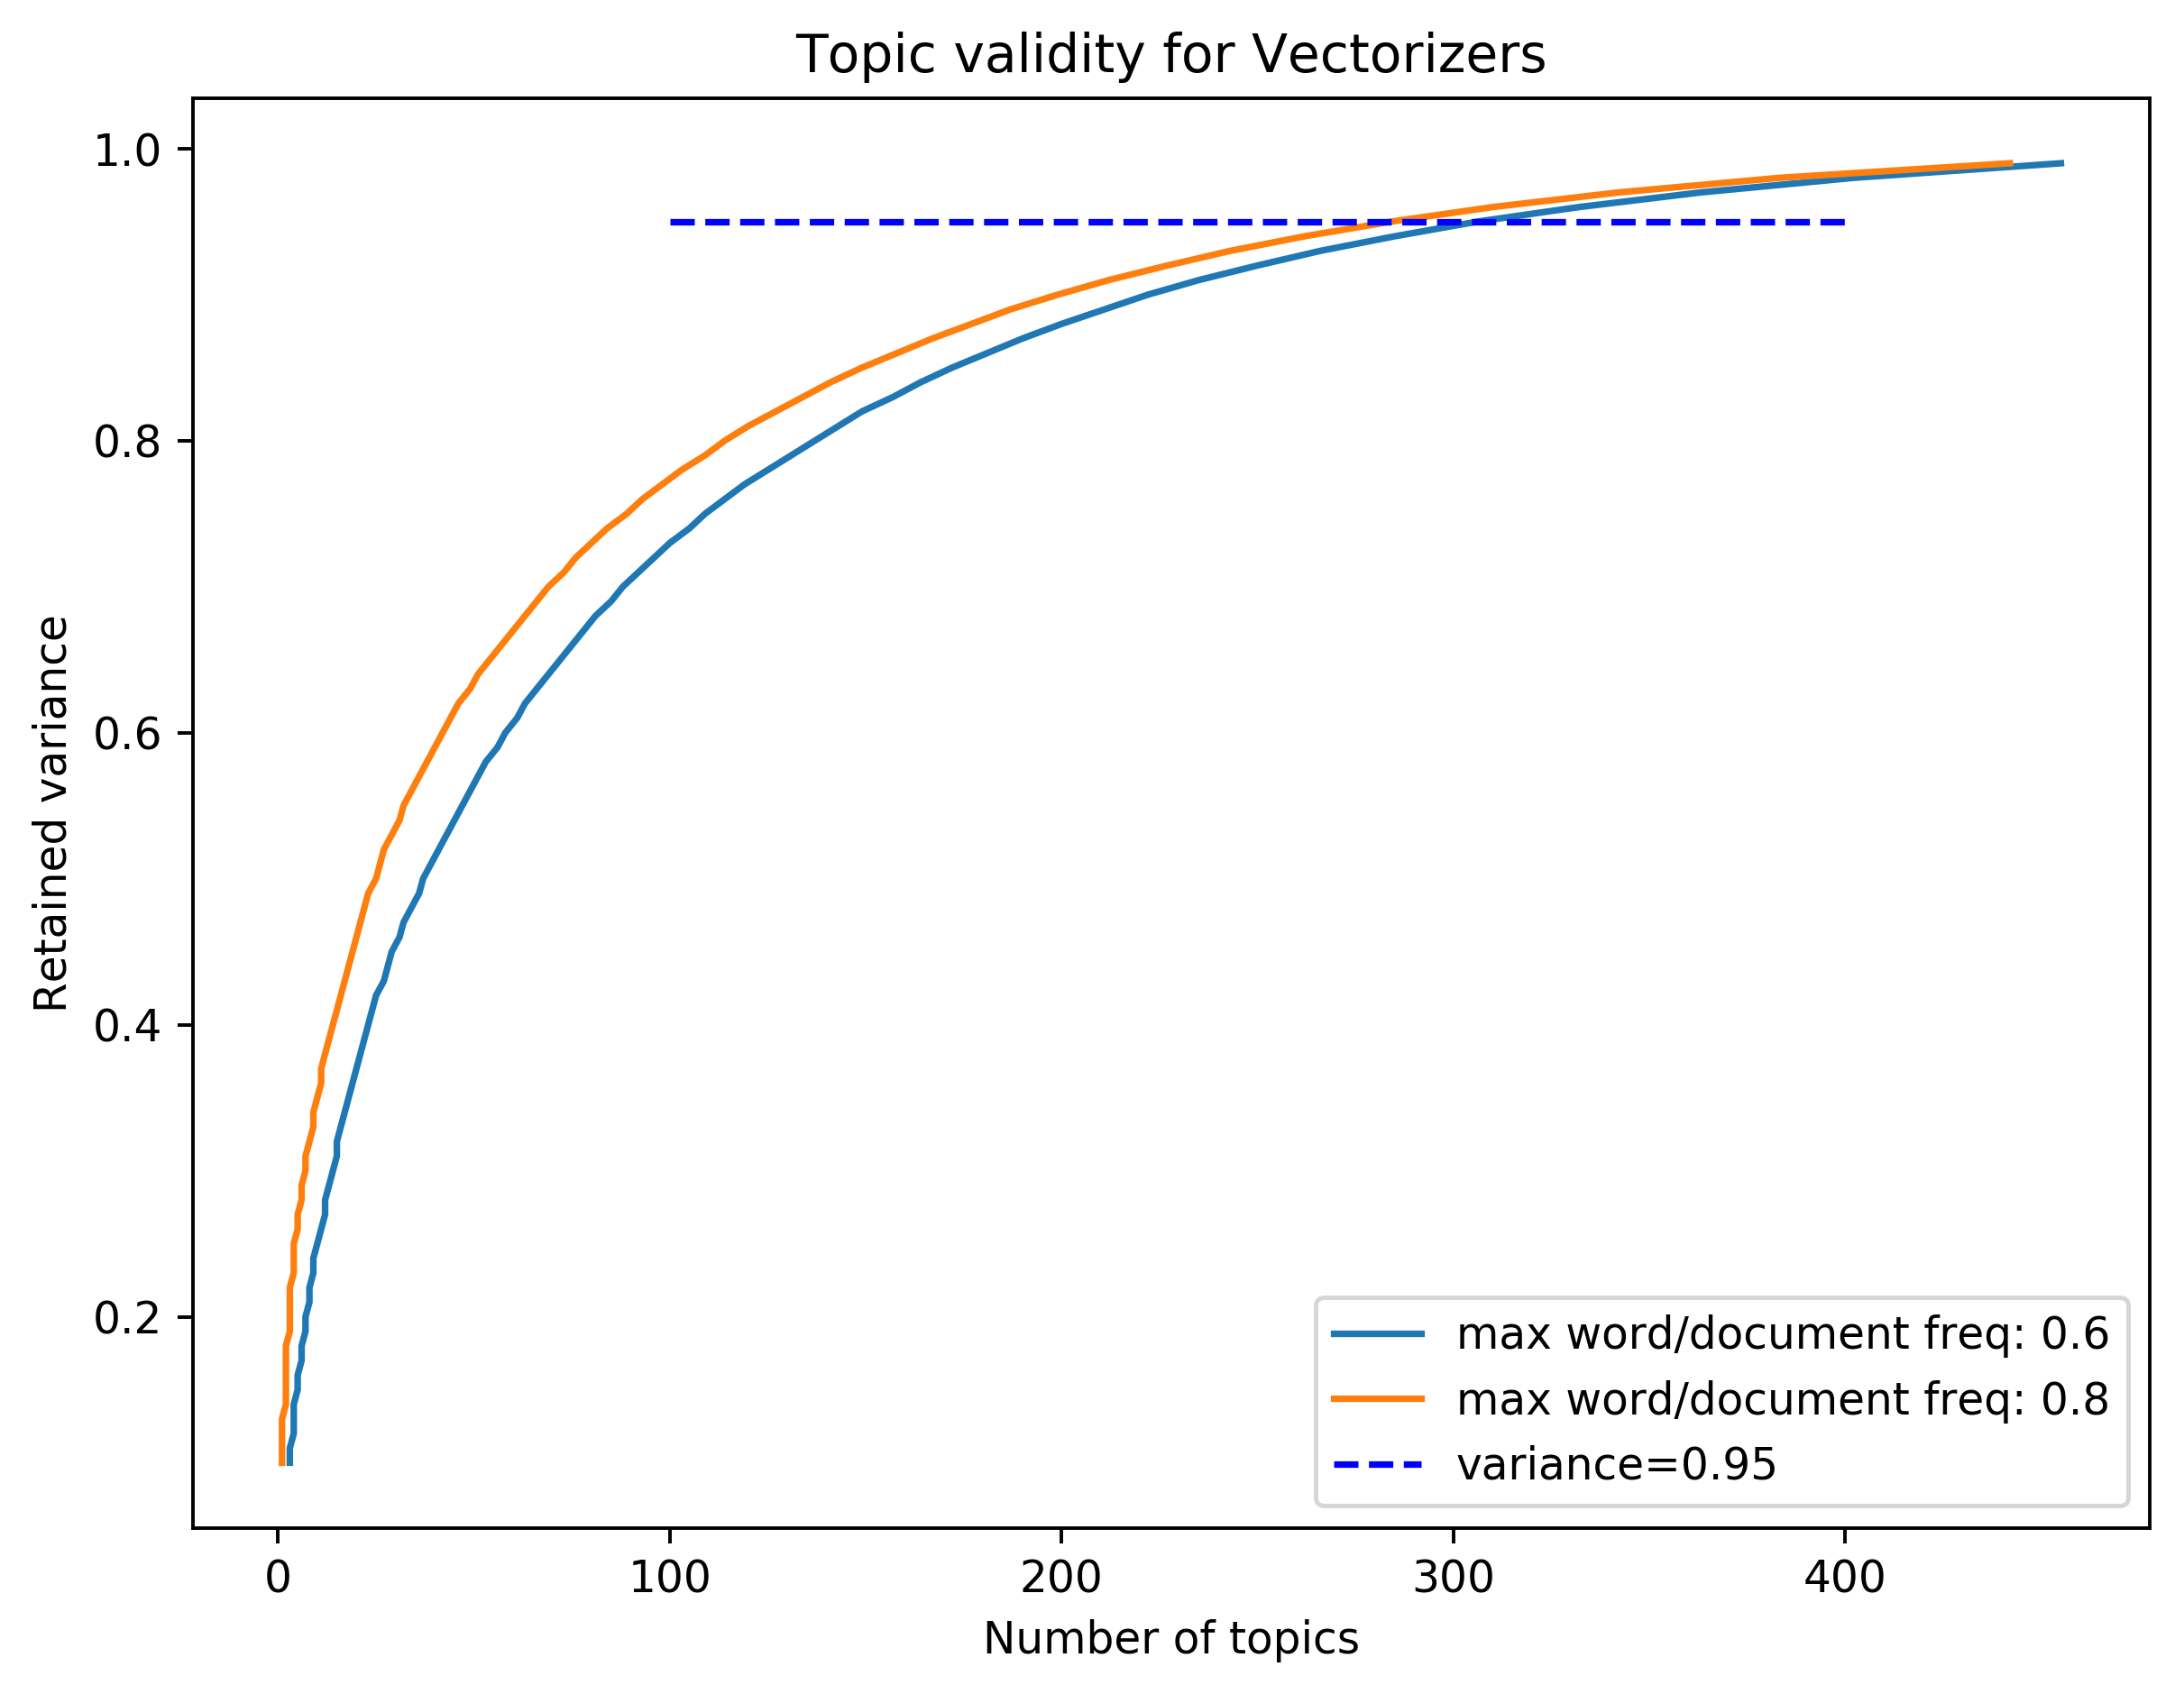

In [11]:
plt.figure(figsize=(8,6), dpi=350)
plt.plot(tf6_res["n_topics"], tf6_res["variance"], label="max word/document freq: 0.6")
#plt.plot(tf_res["n_topics"], tf_res["variance"], label="df_max: 0.4")
plt.plot(cv8_res["n_topics"], cv8_res["variance"], label="max word/document freq: 0.8")
#plt.plot(cv9_res["n_topics"], cv9_res["variance"], label="df_max: 0.9")
plt.plot([100,400],[0.95,0.95], "b--", label="variance=0.95")
plt.legend()
plt.ylabel("Retained variance")
plt.xlabel("Number of topics")
plt.title("Topic validity for Vectorizers");

In [134]:
lsa_tfidf = TruncatedSVD(n_components=0.9)
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)

TypeError: 'float' object cannot be interpreted as an integer

In [138]:
display_topics(nmf_cv, count_vectorizer.get_feature_names(),15)


Topic  0
promoter, differentiation, transfected, repression, transcriptional, vector, sequence, mrna, luciferase, reporter, promoters, sites, induction, bp, transcription

Topic  1
mice, wt, intestinal, wild type, wild, stem, deficient, animals, type mice, wild type mice, pbs, intestine, weeks, injection, mice treated

Topic  2
text, term, nucleotide, attrs, attrs text, term id, entrez, type entrez, id, id term text, term id term, term text, id term, attrs text term, text term

Topic  3
age, set, file, sets, cancer, error, consists, tissues, blood, axis, training, correlation, years, mutations, breast

Topic  4
insulin, glucose, liver, phosphorylation, resistance, insulin resistance, vs, stimulated, diabetes, ib, bars, fed, translocation, sensitivity, actin

Topic  5
neurons, wt, cortical, ros, lipid, brain, versus, fluorescence, neuronal, student test, student, cortex, untreated, fractions, death

Topic  6
tnf, nf, hours, extracts, apoptosis, ros, cells treated, nuclear, inhibits, nm

In [144]:
lsa_tfidf

TruncatedSVD(algorithm='randomized', n_components=0.9, n_iter=5,
       random_state=None, tol=0.0)

In [145]:
display_topics(pca,count_vectorizer.get_feature_names(),15)


Topic  0
mice, insulin, wt, muscle, glucose, wild type, wild, liver, phosphorylation, neurons, mrna, akt, tnf, nf, tumor

Topic  1
akt, text, term, transfected, nuclear, sirna, phosphorylation, nucleotide, promoter, id, attrs, term id, attrs text, nf, type entrez

Topic  2
term, text, age, id, term id, attrs, attrs text, entrez, type entrez, term id term, id term, id term text, term text, attrs text term, text term id

Topic  3
age, set, cancer, file, sets, error, consists, breast, tissues, axis, correlation, blood, years, lines, subjects

Topic  4
rats, insulin, muscle, exercise, glucose, phosphorylation, liver, mitochondrial, lps, akt, animals, skeletal, skeletal muscle, adipose, age

Topic  5
neurons, wt, cortical, ros, brain, lipid, cortex, fluorescence, neuronal, versus, images, student, untreated, student test, bar

Topic  6
tnf, nf, lps, ethanol, hours, exposed, exposure, lung, macrophages, term, ros, text, mitochondria, inflammatory, neurons

Topic  7
ethanol, actin, sirna, ho

Topic  0
mice, anti, gene, dna, activation, mm, binding, antibody, proteins, pcr, signaling, transfected, genes, mrna, phosphorylation

Topic  1
dna, gene, binding, proteins, transfected, pcr, nuclear, genes, promoter, sirna, mutant, rna, domain, flag, assays

Topic  2
age, set, tissue, patients, cancer, size, samples, model, additional, file, sets, tissues, blood, positive, error

Topic  3
text, term, akt, id, attrs text, attrs, term id, type entrez, entrez, nucleotide, term id term, id term text, id term, term text, text term

Topic  4
mice, dna, gene, pcr, genes, promoter, tumor, rna, assays, mouse, wild, wild type, dc, transcription, sequences

Topic  5
age, muscle, insulin, nf, dna, gene, promoter, mrna, tissue, exercise, glucose, rats, liver, tnf, lps

Topic  6
neurons, wt, dna, muscle, insulin, cortical, ros, glucose, primary, pcr, brain, rats, plasma, exercise, membrane

Topic  7
neurons, age, wt, cancer, ros, tnf, file, cortical, set, sets, primary, additional, error, consists, tissue

Topic  8
nf, tnf, lps, patients, activation, ethanol, neurons, macrophages, ros, lane, lung, gene, term, positive, text

Topic  9
ethanol, set, mitochondrial, size, hours, lps, mice, mm, mitochondria, exposed, tnf, targeting, age, sirna, model

Topic  10
aokt, set, comparison, information, self, participants, positive, nf, neurons, size, target, activation, experiment, task, similarity

Topic  11
patients, mitochondrial, positive, sirna, ethanol, self, comparison, nuclear, transfected, actin, muscle, participants, information, cancer, hours

Topic  12
dc, dna, rats, neurons, antibody, ethanol, assays, target, pcr, comparison, self, antigen, positive, lps, day

Topic  13
akt, tissue, cancer, drug, tumor, actin, target, mice, growth, comparison, dna, self, tissues, positive, tumors

Topic  14
comparison, positive, self, muscle, information, tissue, mitochondrial, participants, similarity, drug, targets, wild, wild type, negative, age

Topic  15
actin, gfp, lps, nuclear, anti, nf, bar, nucleus, rats, red, age, kd, migration, usa, tissue

Topic  16
anti, drug, nuclear, patients, tissue, flag, mice, nf, tnf, neurons, antibodies, tissues, cells transfected, hours, coefficients

Topic  17
muscle, size, tumor, drug, tissue, set, dc, insulin, nuclear, differentiation, cm, skeletal, skeletal muscle, tissues, cancer

Topic  18
dna, nf, lane, actin, tnf, ap, muscle, nm, patients, dc, akt, tissue, kd, comparison, binding

Topic  19
insulin, glucose, liver, patients, ethanol, nf, plasma, stimulation, nm, cancer, binding, actin, mm, membrane, dc

Topic  20
akt, tissue, old, signaling, drug, tgf, patients, young, receptor, stimulation, mrna, renal, genes, ethanol, pcr

Topic  21
lps, tissue, drug, lung, muscle, target, patients, subjects, np, dc, stimulation, macrophages, akt, wt, response

Topic  22
old, np, young, receptor, target, signaling, nm, laser, optical, gold, generation, clusters, anti, cancer, pulse

Topic  23
task, activation, trials, tissue, patients, binding, performance, ethanol, promoter, ischemia, wild type, wild, rats, regions, domain

Topic  24
np, nm, age, lane, ap, mo, target, laser, optical, gold, ischemia, mrna, generation, clusters, task

Topic  25
mo, model, nuclear, old, task, young, tumor, state, mn, rwyear rwyear, false, binding, trials, cases, health

Topic  26
lane, ap, binding, site, ethanol, differentiation, rats, promoter, lanes, size, positive, bone, lps, mouse, signaling

Topic  27
brain, mrna, plasma, mitochondrial, aa, acid, cancer, oil, task, cox, fatty, concentrations, concentration, liver, mean

Topic  28
mitochondrial, tgf, tumor, task, genes, mm, ap, binding, fibroblasts, activation, set, exercise, kinase, glucose, trials

Topic  29
mitochondrial, nuclear, exercise, gene, binding, old, genes, lung, size, rats, young, akt, rna, host, population

Topic  30
dc, ap, degradation, strain, lane, task, akt, old, growth, young, nm, nuclear, trials, patients, stress

Topic  31
tumor, old, mo, young, rwnum rwnum, promoter, akt, anti, mm, model, lps, ischemia, tumors, strain, insulin

Topic  32
mo, patients, tgf, ap, set, liver, phase, fibroblasts, dc, mitochondrial, tumor, wild type, model, exercise, mrna

Topic  33
cancer, ischemia, renal, dc, glucose, minutes, ischemic, mitochondrial, promoter, breast, oil, binding, nuclear, assay, lung

Topic  34
mouse, lung, task, activation, fibroblasts, lines, positive, infected, dna, dc, mrna, infection, old, cell lines, anti

Topic  35
lane, ap, renal, mo, ischemia, cancer, ros, signaling, stimulation, plants, nm, task, genes, production, rwnum rwnum

Topic  36
stimulation, population, mitochondrial, pathogen, host, rwnum rwnum, drug, populations, pathogens, nf, promoter, actin, release, age, wild

Topic  37
strain, tumor, gfp, plasma, renal, degradation, activation, mutant, strains, wt, muscle, tgf, pcr, membrane, signaling

Topic  38
bone, cancer, exercise, anti, mitochondrial, proteins, ap, memory, infected, infection, task, mrna, ser, formation, cm

Topic  39
mrna, subjects, insulin, renal, proteins, ischemia, ap, light, phase, rna, binding, tgf, temperature, brain, population

Topic  40
phase, light, temperature, degradation, release, memory, heat, muscle, cl, power, samples, cycle, stimulation, thermal, drug

Topic  41
tgf, rwnum rwnum, exercise, ethanol, macrophages, ifn, migration, strain, node, model, rna, food, fibroblasts, cancer, gfp

Topic  42
model, mrna, strain, stimulation, release, actin, node, brain, cancer, cortex, models, drug, breast, mrna levels, mm

Topic  43
subjects, stimulation, macrophages, ap, bone, normal, movement, mitochondrial, response, tnf, force, coordinated, phosphorylation, node, oil

Topic  44
genes, model, plasma, liver, lines, ischemia, lps, anti, akt, node, renal, models, differentiation, hepatic, cell lines

Topic  45
rwnum rwnum, ap, kinase, model, wild, wild type, genes, ethanol, neurons, samples, actin, tnf, cm, cancer, antibody

Topic  46
cm, stimulation, tgf, oil, lung, activation, nf, ethanol, epithelial, cancer, gastric, day, mutant, force, individuals

Topic  47
macrophages, mm, migration, dc, degradation, promoter, strain, transgenic, pathogen, pc, tyrosine, host, buffer, plants, pathogens

Topic  48
stimulation, bone, tnf, degradation, transfected, rna, rats, sirna, movement, mouse, wt, patient, light, proteins, sp

Topic  49
lung, rwnum rwnum, plants, transgenic, cm, nuclear, cl, lines, membrane, plasma, renal, liver, tumor, growth, bone

In [20]:
from sklearn.manifold import TSNE